In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.mplot3d import Axes3D

In [114]:
def clean_list(s):
    output = ""
    for c in s:
        if c >= '0' and c <= '9' or c == '.' or c == ' ' or c == 'e' or c == '-':
            output += c
            
    return output

In [128]:
def community_mapping(communities):
    str_int, int_str = {}, {}
    cnt = 0
    
    for community in communities:
        if community not in str_int:
            str_int[community] = cnt
            int_str[cnt] = community
            cnt += 1
            
    return (str_int, int_str)

In [140]:
maps = {}
files = glob.glob("analysis/*")

for file in files:
    user = file.split('/')[1].split('.')[0][6:]
    
    data = pd.read_csv('stat428/'+user+'.csv').values
    data = data[data[:,-1].argsort()]
    
    (_, community_int_str) = community_mapping(data[:, 0])
    maps[user] = community_int_str

In [126]:
community_weights = []
files = glob.glob("analysis/*")

for file in files:
    df = pd.read_csv(file)
    vals = clean_list(df['mean_action_weight'].values[0]).split()
    community_weights.append([float(val) for val in vals])
    
df = pd.DataFrame(data=community_weights)
print(df.shape)
df.to_csv('action_weight.csv')

(180, 3)


In [127]:
community_weights = []
files = glob.glob("analysis/*")

for file in files:
    df = pd.read_csv(file)
    vals = clean_list(df['mean_community_weight'].values[0]).split()
    community_weights.append([float(val) for val in vals])
    
df = pd.DataFrame(data=community_weights)
print(df.shape)
df.to_csv('community_weight.csv')

(180, 93)


In [155]:
community_heat = {}
files = glob.glob("analysis/*")

for file in files:
    user = file.split('/')[1].split('.')[0][6:]
    df = pd.read_csv(file)
    
    vals = clean_list(df['mean_community_weight'].values[0]).split()
    weights = np.array([float(val) for val in vals])
    
    args = np.argsort(-weights)
    cnt = 0
    for arg in args:
        if arg in maps[user]:
            community_heat[maps[user][arg]] = community_heat.get(maps[user][arg], 0) + 1
            cnt += 1
        if cnt == 3:
            break

{'electronics': 19, 'apple': 56, 'gis': 17, 'english': 40, 'gaming': 40, 'dba': 23, 'diy': 32, 'ell': 1, 'codereview': 20, 'askubuntu': 33, 'homebrew': 6, 'aviation': 3, 'history': 7, 'crypto': 7, 'expatriates': 3, 'french': 4, 'boardgames': 7, 'fitness': 7, 'cooking': 31, 'avp': 4, 'bricks': 6, 'health': 1, 'earthscience': 2, 'gardening': 10, 'android': 25, 'es_stackoverflow': 2, 'gamedev': 19, 'graphicdesign': 5, 'german': 4, 'drupal': 6, 'engineering': 1, 'bicycles': 13, 'ham': 3, 'buddhism': 1, 'beer': 2, 'biology': 1, 'christianity': 5, 'hermeneutics': 5, 'law': 1, 'judaism': 4, 'academia': 2, 'bitcoin': 3, 'codegolf': 10, 'hardwarerecs': 1, 'dsp': 3, 'freelancing': 2, 'emacs': 2, 'expressionengine': 2, 'joomla': 1, 'cs': 3, '3dprinting': 2, 'cstheory': 1, 'anime': 1, 'latin': 1, 'japanese': 2, 'ai': 1, 'economics': 1, 'lifehacks': 1, 'linguistics': 1, 'chemistry': 1}


In [159]:
dict_df = {key:[val] for key, val in community_heat.items()}
df = pd.DataFrame(data=dict_df)
df.to_csv('community_overview.csv')

In [161]:
communities = [c for c, _ in community_heat.items()]

In [167]:
maps['4495']

{0: 'apple',
 1: 'codereview',
 2: 'gis',
 3: 'english',
 4: 'electronics',
 5: 'dba'}

In [185]:
all_heat = {c:[] for c in communities}
all_heat['user'] = []
files = glob.glob("analysis/*")

for file in files:
    user = file.split('/')[1].split('.')[0][6:]
    df = pd.read_csv(file)
    
    vals = clean_list(df['mean_community_weight'].values[0]).split()
    weights = np.array([float(val) for val in vals])

    all_heat['user'].append(user)
    cur_communities = []
    for idx, weight in enumerate(weights):
        cur_community = maps[user][idx]
        if cur_community not in all_heat:
            all_heat[cur_community] = []
        all_heat[cur_community].append(weight)
        cur_communities.append(cur_community)
        
        if idx + 1 == len(maps[user]):
            break
    
    for c in communities:
        if c not in cur_communities:
            all_heat[c].append(0)

In [191]:
empty_key = []
for key, val in all_heat.items():
    if len(val) != 180:
        empty_key.append(key)
        
for key in empty_key:
    del all_heat[key]

In [196]:
df = pd.DataFrame()
for key, val in all_heat.items():
    df[key] = val
    
df.to_csv('user_community.csv')

In [ ]:
dict_df = {key:[val] for key, val in community_heat.items()}
df = pd.DataFrame(data=dict_df)
df.to_csv('community_overview.csv')

Text(0.5,0,'others')

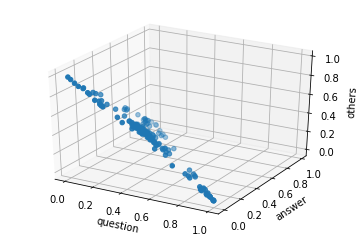

In [118]:
ax = plt.axes(projection='3d')
ax.scatter(xs=xs, ys=ys, zs=zs, cmap='Greens')
ax.set_xlabel('question')
ax.set_ylabel('answer')
ax.set_zlabel('others')

In [147]:
d = {}
d.get(0, 0)

0